In [1]:
import librosa

In [3]:
import os
import numpy as np
import matplotlib.pyplot as plt
import librosa.display
import IPython.display as ipd

In [4]:
BASE_FOLDER = "C:/Users/USER/OneDrive/Desktop/STC/"
audio_file = "test.mp3"
ipd.Audio(audio_file)

In [9]:
y, sr = librosa.load(audio_file)
onset_env = librosa.onset.onset_strength(y=y, sr=sr, hop_length=512, aggregate=np.median)

# Detect note onsets
onset_frames = librosa.onset.onset_detect(onset_envelope=onset_env, sr=sr, hop_length=512)

In [15]:
scales = []
notes = []

# Iterate through the onset frames and analyze each second
for onset_frame in onset_frames:
    # Convert frame number to time in seconds
    time_in_seconds = librosa.frames_to_time(onset_frame, sr=sr)

    # Get audio segment for each second centered around the onset
    segment_start = int((time_in_seconds - 0.5) * sr)
    segment_end = int((time_in_seconds + 0.5) * sr)
    segment = y[segment_start:segment_end]

    # Calculate the chroma feature using CQT (Constant-Q Transform)
    chroma = librosa.feature.chroma_cqt(y=segment, sr=sr)

    # Sum the chroma features over time to get the overall chroma vector
    chroma_sum = chroma.sum(axis=1)

    # Get the index of the maximum value in the chroma vector
    max_chroma_index = chroma_sum.argmax()
    notes.append(max_chroma_index)

In [16]:
for i, note in enumerate(notes):
    print(f"Second {i+1}: Note = {note}")

Second 1: Note = 0
Second 2: Note = 0
Second 3: Note = 0
Second 4: Note = 0
Second 5: Note = 0
Second 6: Note = 5
Second 7: Note = 5
Second 8: Note = 5
Second 9: Note = 5
Second 10: Note = 5
Second 11: Note = 7
Second 12: Note = 4
Second 13: Note = 0
Second 14: Note = 0
Second 15: Note = 0
Second 16: Note = 0
Second 17: Note = 0
Second 18: Note = 5
Second 19: Note = 5
Second 20: Note = 5
Second 21: Note = 5
Second 22: Note = 5
Second 23: Note = 7
Second 24: Note = 4
Second 25: Note = 7
Second 26: Note = 3
Second 27: Note = 11
Second 28: Note = 11
Second 29: Note = 4
Second 30: Note = 4
Second 31: Note = 4
Second 32: Note = 4
Second 33: Note = 4
Second 34: Note = 4
Second 35: Note = 4
Second 36: Note = 3
Second 37: Note = 6
Second 38: Note = 3
Second 39: Note = 11
Second 40: Note = 11
Second 41: Note = 4
Second 42: Note = 4
Second 43: Note = 4
Second 44: Note = 4
Second 45: Note = 4
Second 46: Note = 4
Second 47: Note = 4
Second 48: Note = 6
Second 49: Note = 0
Second 50: Note = 0
Secon

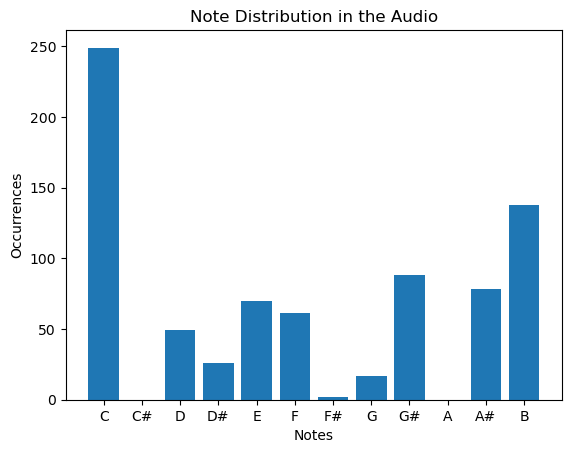

In [17]:
notes_names = ['C', 'C#', 'D', 'D#', 'E', 'F', 'F#', 'G', 'G#', 'A', 'A#', 'B']

# Count the occurrences of each note
note_counts = np.bincount(notes)

# Plot the notes as a bar chart
plt.bar(range(len(note_counts)), note_counts)
plt.xticks(range(len(note_counts)), notes_names)
plt.xlabel('Notes')
plt.ylabel('Occurrences')
plt.title('Note Distribution in the Audio')
plt.show()